<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

The problem we are going to solve is to classify grayscale images of handwitten digits (28 x 28 pixels) into their 10 categories (0 through 9). We will use the MNIST dataset, a classic in the machine learning community. IT is a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. Solving MNIST is the "Hello World" of deep learning. The MNIST dataset comes preloaded in Keras, in the form of a set of Numpy array All we do is load the dataset. The images are encoded in as Numpy arrays, and the labels are an array of digits, ranging from 0 t0 9. The images and the labels have a ont-to-one correspondence.

In [1]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#Loading MNIST training and testing dataset
(train_images, train_labels) , (test_images, test_labels) = keras.datasets.mnist.load_data()

*The train data:*

In [3]:
# Shape of the train data
train_images.shape


(60000, 28, 28)

The shape of the train_images means that we have 60,000 sample of hand written images of 28x28 pixels each. 

In [4]:
#Number train image samples
len(train_images)

60000

In [5]:
# Actual values of the train images (labels)
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
#Length of actual values of the train image
len(train_labels)

60000

In [7]:
#The first train_image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

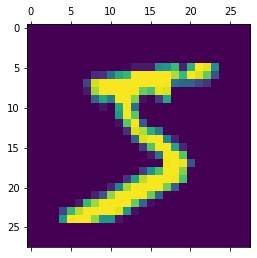

In [8]:
#Visualizing the image
plt.matshow(train_images[0])

In [9]:
# The valu of the above hand written digit, the image is digit 5.
train_labels[0]

5

**The test data:**

In [11]:
test_images.shape

(10000, 28, 28)

The shape of the test_images means that we have 10,000 sample of images of 28x28 pixels each.

In [12]:
len(test_images)

10000

In [13]:
len(test_labels)

10000

In [14]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Data preparation
Before training, we will preprocess the data by flattening (reshaping) it into the shape of the network expects and scaling it so that all values are in the [0,1] interval.

In [15]:
#Preparing the image data
train_images_flattened = train_images.reshape(len(train_images), train_images.shape[1] * train_images.shape[2])
train_images_flattened = train_images_flattened.astype("float32") / np.max(train_images_flattened)

test_images_flattened = test_images.reshape(len(test_images), test_images.shape[1] * test_images.shape[2])
test_images_flattened = test_images_flattened.astype("float32") / np.max(test_images_flattened)


In [16]:
train_images_flattened.shape

(60000, 784)

In [17]:
test_images_flattened.shape

(10000, 784)

### Build model 1 (NN with no hidden layer)
Let us create a simple neural network of 784 input layers and 10 ouput layers

In [18]:

model_1 = keras.Sequential()
model_1.add(keras.layers.Dense(10, input_shape=(784,), activation="sigmoid"))

model_1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

We used "sparse categorical crossentropy" as the loss because our output variable is integer (0 to 9). If the output variable is one hot encoded array, we will probably use "categorical crossentropy" as the loss.

### Train model 1

In [19]:

model_1.fit(train_images_flattened, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4694 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9257


Two quantities are displayed during training: the loss of the network over the training data and the accuracy of the network over the training data. Our target is to minimize the loss and maximize the accuracy. From the last epoch, the accuracy is 0.9262 (92.6%), meaning 92.6% of time our model will make accurate prediction.

### Evaluate model 1

In [21]:
model_1.evaluate(test_images_flattened, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2691 - accuracy: 0.9259


[0.26906824111938477, 0.9258999824523926]

### Predictions on new data

Let's randomly select five test images and see if our model will predict what they are

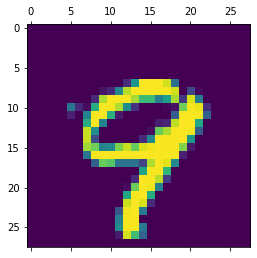

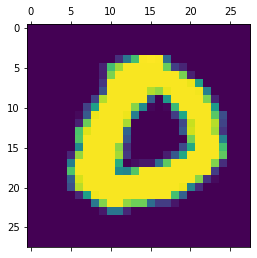

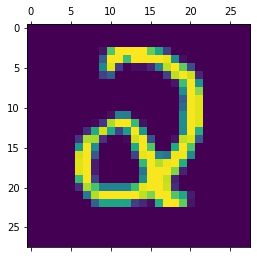

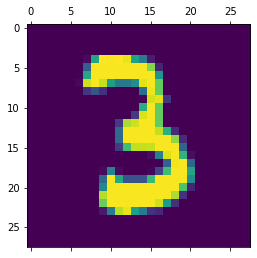

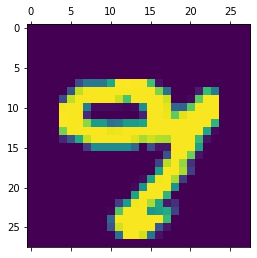

In [41]:
images_idx = []
for i in range(5):
  image = np.random.choice(np.array([i for i in range(len(test_images))]))
  images_idx.append(image)
  plt.matshow(test_images[image])



In [42]:
predicted_scores = model_1.predict(test_images_flattened)
for i in images_idx:
  print("Predicted_value:", np.argmax(predicted_scores[i]),"  Actual_value:", test_labels[i])

313/313 [==============================] - 0s 1ms/step
Predicted_value: 9   Actual_value: 9
Predicted_value: 0   Actual_value: 0
Predicted_value: 6   Actual_value: 2
Predicted_value: 3   Actual_value: 3
Predicted_value: 7   Actual_value: 9


Let's measure the performance of our model using "Confusion Matrix".<p>
A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [43]:
predicted_labels = np.array([np.argmax(i) for i in predicted_scores])
cm = tf.math.confusion_matrix(labels=test_labels, predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    8,  945,   15,    9,    3,   12,   10,   21,    3],
       [   4,    0,   23,  923,    0,   23,    2,   13,   15,    7],
       [   2,    2,    2,    1,  922,    0,   11,    4,    7,   31],
       [  11,    3,    5,   32,   12,  778,   13,    6,   27,    5],
       [  14,    3,    6,    1,    8,   10,  912,    2,    2,    0],
       [   1,    7,   25,    6,    8,    0,    0,  952,    1,   28],
       [  11,   13,   11,   28,    9,   35,    8,   12,  831,   16],
       [  11,    7,    1,   10,   28,    8,    0,   28,    3,  913]],
      dtype=int32)>

Let's visualize the confusion matrix with heatmap

Text(33.0, 0.5, 'True Value')

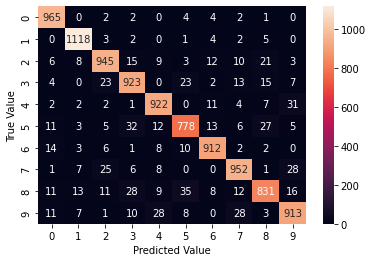

In [44]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

### Build model 2 (NN with hidden layer)
We will add a hidden layer of 500 nodes with ReLu activation function to this second model and compare its performance with the first model. There is no thumb rule in choosing number of hidden layer's nodes. We choose an arbitrary number until we have a better model performance.

In [45]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(500, input_shape=(784,), activation="relu"))
model_2.add(keras.layers.Dense(10, activation="sigmoid"))

model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Train model 2

In [46]:
model_2.fit(train_images_flattened, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2016 - accuracy: 0.9414
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0811 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0376 - accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9909


Obviously, model_2 did well during training when compared with the first model.





### Evaluate model 2

In [47]:
model_2.evaluate(test_images_flattened, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9741


[0.08549612760543823, 0.9740999937057495]

Model_2 also did well during evaluation when compared with the first model

### Predictions on new data
Let's randomly select five test images and see if our model will predict what they are

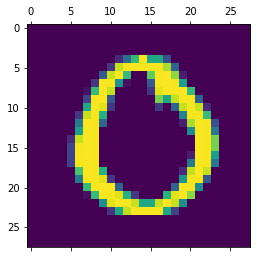

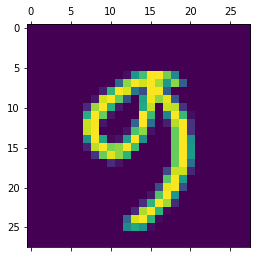

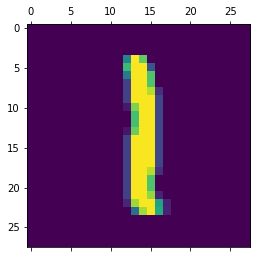

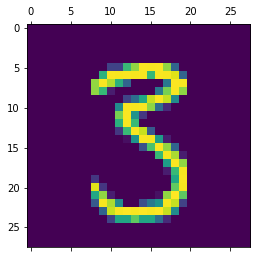

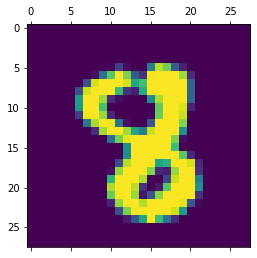

In [48]:
images_idx = []
for i in range(5):
  image = np.random.choice(np.array([i for i in range(len(test_images))]))
  images_idx.append(image)
  plt.matshow(test_images[image])


In [49]:
predicted_scores = model_2.predict(test_images_flattened)
for i in images_idx:
  print("Predicted_value:", np.argmax(predicted_scores[i]),"  Actual_value:", test_labels[i])

313/313 [==============================] - 1s 2ms/step
Predicted_value: 0   Actual_value: 0
Predicted_value: 9   Actual_value: 9
Predicted_value: 1   Actual_value: 1
Predicted_value: 3   Actual_value: 3
Predicted_value: 8   Actual_value: 8


### Model 2 Confusion Matrix

In [50]:
predicted_labels = np.array([np.argmax(i) for i in predicted_scores])
cm_2 = tf.math.confusion_matrix(labels=test_labels, predictions=predicted_labels)
cm_2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    2,    0,    1,    0,    3,    1,    1,    2],
       [   0, 1114,    3,    4,    0,    0,    1,    5,    7,    1],
       [   1,    0, 1015,    3,    3,    0,    2,    4,    3,    1],
       [   0,    0,    5,  994,    1,    0,    0,    4,    2,    4],
       [   3,    0,    4,    0,  936,    0,    3,    6,    2,   28],
       [   3,    1,    0,   26,    1,  850,    3,    0,    4,    4],
       [   4,    2,    0,    1,    3,    5,  938,    3,    2,    0],
       [   1,    0,   12,    2,    0,    0,    0, 1007,    4,    2],
       [   5,    0,    4,   16,    0,    0,    1,    4,  938,    6],
       [   2,    1,    0,   12,    2,    0,    0,    8,    4,  980]],
      dtype=int32)>

Text(33.0, 0.5, 'True Value')

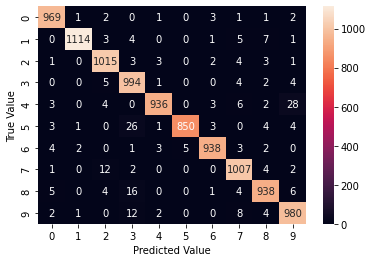

In [51]:
sns.heatmap(cm_2, annot=True, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

**The second neural network (model_2) outperformed the first neural network (model_1). We can conclude that adding hidden layer(s) to nerual network helps in inmproving its performance**.